In [1]:
import json
import statistics
import os
from typing import List, Dict, Tuple, Union
import pandas as pd

# AI runs analysis

In [2]:
FOLDER_NAMES: List[str] = ['Four of the Same Type (BASIC)', 'Four of the Same Type (REACTIVE)', 'Four of the Same Type (SHORT_FUSE)', 'Three and One (3 BASIC, 1 REACTIVE)', 'Three and One (3 BASIC, 1 SHORT_FUSE)', 'Three and One (3 REACTIVE, 1 BASIC)', 'Three and One (3 REACTIVE, 1 SHORT_FUSE)', 'Three and One (3 SHORT_FUSE, 1 BASIC)', 'Three and One (3 SHORT_FUSE, 1 REACTIVE)', 'Two, one and one (2 BASIC, 1 REACTIVE, 1 SHORT_FUSE)', 'Two, one and one (2 REACTIVE, 1 BASIC, 1 SHORT_FUSE)', 'Two, one and one (2 SHORT_FUSE, 1 BASIC, 1 REACTIVE)', 'Two and two (2 BASIC, 2 REACTIVE)', 'Two and two (2 BASIC, 2 SHORT_FUSE)', 'Two and two (2 REACTIVE, 2 SHORT_FUSE)']
NUMBER_OF_FILES_PER_FOLDER: int = 10

DATA_ROOT_PATH: str = os.path.join('..', 'output', 'all')

In [3]:
def process_folder(folder_name: str, num_files: int, data_root: str) -> Dict[str, Dict[str, float]]:
    """
    Processes a set of JSON files for a given folder_name within the specified data_root.
    Calculates the mean and median counts for 'gameMoves' and 'doSomethingTimestamps'.

    Arguments:
        folder_name: The name of the folder containing the JSON files
        num_files: The number of files to process (it is always 10 in this case)
        data_root: The base path where the folder_name directories are located ('../output').

    Returns:
        A dictionary containing the calculated mean and median for each field.
    """
    game_moves_counts: List[int] = []
    do_something_timestamps_counts: List[int] = []

    for i in range(1, num_files + 1):
        file_name: str = f"{folder_name}_{i}.json"

        # Construct the full path to the JSON file
        file_path: str = os.path.join(data_root, folder_name, file_name)

        try:
            with open(file_path, 'r') as f:
                data: Dict = json.load(f)

            # Count the number of keys in the specified fields
            game_moves_count: int = len(data.get("gameMoves", {}))
            do_something_timestamps_count: int = len(data.get("doSomethingTimestamps", {}))

            game_moves_counts.append(game_moves_count)
            do_something_timestamps_counts.append(do_something_timestamps_count)

        except FileNotFoundError:
            print(f"File not found at {file_path}. Skipping.")
        except json.JSONDecodeError:
            print(f"Could not decode JSON from {file_path}. Skipping.")
        except Exception as e:
            print(f"An unexpected error occurred with {file_path}: {e}")

    if not game_moves_counts:
        return {}

    # Calculate mean and median for all collected counts
    folder_results: Dict[str, Dict[str, float]] = {
        "gameMoves": {
            "mean_count": statistics.mean(game_moves_counts),
            "median_count": statistics.median(game_moves_counts)
        },
        "doSomethingTimestamps": {
            "mean_count": statistics.mean(do_something_timestamps_counts),
            "median_count": statistics.median(do_something_timestamps_counts)
        }
    }

    return folder_results

In [4]:
# Dictionary to hold the final results for all folders
all_results: Dict[str, Dict[str, Dict[str, float]]] = {}

# Main loop to process all defined folders
for folder in FOLDER_NAMES:
    # UPDATED: Pass the data_root path
    results = process_folder(folder, NUMBER_OF_FILES_PER_FOLDER, DATA_ROOT_PATH)
    if results:
        all_results[folder] = results

In [5]:
# Prepare data for DataFrame
data_for_df = []

for folder, stats in all_results.items():
    data_for_df.append({
        "Folder": folder,
        "Field": "gameMoves",
        "Mean Count": stats['gameMoves']['mean_count'],
        "Median Count": stats['gameMoves']['median_count']
    })
    data_for_df.append({
        "Folder": folder,
        "Field": "doSomethingTimestamps",
        "Mean Count": stats['doSomethingTimestamps']['mean_count'],
        "Median Count": stats['doSomethingTimestamps']['median_count']
    })

df_ai = pd.DataFrame(data_for_df)

df_ai

,Folder,Field,Mean Count,Median Count
0,Four of the Same Type (BASIC),gameMoves,299.5,319.5
1,Four of the Same Type (BASIC),doSomethingTimestamps,58.6,27.0
2,Four of the Same Type (REACTIVE),gameMoves,139.1,150.5
3,Four of the Same Type (REACTIVE),doSomethingTimestamps,40.0,7.0
4,Four of the Same Type (SHORT_FUSE),gameMoves,340.0,285.0
5,Four of the Same Type (SHORT_FUSE),doSomethingTimestamps,479.1,242.5
6,"Three and One (3 BASIC, 1 REACTIVE)",gameMoves,227.8,272.5
7,"Three and One (3 BASIC, 1 REACTIVE)",doSomethingTimestamps,89.2,39.5
8,"Three and One (3 BASIC, 1 SHORT_FUSE)",gameMoves,326.6,319.0
9,"Three and One (3 BASIC, 1 SHORT_FUSE)",doSomethingTimestamps,61.4,53.0


In [6]:
# sorting them by win/lose
DATA_ROOT_PATH: str = os.path.join('..', 'output', 'won')

# Dictionary to hold the final results for all folders
won_results: Dict[str, Dict[str, Dict[str, float]]] = {}

# Main loop to process all defined folders
for folder in FOLDER_NAMES:
    # UPDATED: Pass the data_root path
    results = process_folder(folder, NUMBER_OF_FILES_PER_FOLDER, DATA_ROOT_PATH)
    if results:
        won_results[folder] = results

File not found at ..\output\won\Four of the Same Type (BASIC)\Four of the Same Type (BASIC)_2.json. Skipping.
File not found at ..\output\won\Four of the Same Type (BASIC)\Four of the Same Type (BASIC)_3.json. Skipping.
File not found at ..\output\won\Four of the Same Type (BASIC)\Four of the Same Type (BASIC)_5.json. Skipping.
File not found at ..\output\won\Four of the Same Type (BASIC)\Four of the Same Type (BASIC)_9.json. Skipping.
File not found at ..\output\won\Four of the Same Type (BASIC)\Four of the Same Type (BASIC)_10.json. Skipping.
File not found at ..\output\won\Four of the Same Type (REACTIVE)\Four of the Same Type (REACTIVE)_1.json. Skipping.
File not found at ..\output\won\Four of the Same Type (REACTIVE)\Four of the Same Type (REACTIVE)_2.json. Skipping.
File not found at ..\output\won\Four of the Same Type (REACTIVE)\Four of the Same Type (REACTIVE)_3.json. Skipping.
File not found at ..\output\won\Four of the Same Type (REACTIVE)\Four of the Same Type (REACTIVE)_4.j

In [7]:
# Prepare data for DataFrame
data_for_df = []

for folder, stats in won_results.items():
    data_for_df.append({
        "Folder": folder,
        "Field": "gameMoves",
        "Mean Count": stats['gameMoves']['mean_count'],
        "Median Count": stats['gameMoves']['median_count']
    })
    data_for_df.append({
        "Folder": folder,
        "Field": "doSomethingTimestamps",
        "Mean Count": stats['doSomethingTimestamps']['mean_count'],
        "Median Count": stats['doSomethingTimestamps']['median_count']
    })

df_ai_won = pd.DataFrame(data_for_df)

# round all results to one decimal
df_ai_won = df_ai_won.round(1)

df_ai_won

,Folder,Field,Mean Count,Median Count
0,Four of the Same Type (BASIC),gameMoves,320.6,319.0
1,Four of the Same Type (BASIC),doSomethingTimestamps,61.0,27.0
2,Four of the Same Type (SHORT_FUSE),gameMoves,295.1,261.0
3,Four of the Same Type (SHORT_FUSE),doSomethingTimestamps,622.0,330.0
4,"Three and One (3 BASIC, 1 REACTIVE)",gameMoves,295.4,293.0
5,"Three and One (3 BASIC, 1 REACTIVE)",doSomethingTimestamps,96.4,38.0
6,"Three and One (3 BASIC, 1 SHORT_FUSE)",gameMoves,365.3,419.0
7,"Three and One (3 BASIC, 1 SHORT_FUSE)",doSomethingTimestamps,92.0,83.0
8,"Three and One (3 REACTIVE, 1 BASIC)",gameMoves,302.0,302.0
9,"Three and One (3 REACTIVE, 1 BASIC)",doSomethingTimestamps,30.0,30.0


In [8]:
# sorting them by win/lose
DATA_ROOT_PATH: str = os.path.join('..', 'output', 'lost')

# Dictionary to hold the final results for all folders
lost_results: Dict[str, Dict[str, Dict[str, float]]] = {}

# Main loop to process all defined folders
for folder in FOLDER_NAMES:
    # UPDATED: Pass the data_root path
    results = process_folder(folder, NUMBER_OF_FILES_PER_FOLDER, DATA_ROOT_PATH)
    if results:
        lost_results[folder] = results

File not found at ..\output\lost\Four of the Same Type (BASIC)\Four of the Same Type (BASIC)_1.json. Skipping.
File not found at ..\output\lost\Four of the Same Type (BASIC)\Four of the Same Type (BASIC)_4.json. Skipping.
File not found at ..\output\lost\Four of the Same Type (BASIC)\Four of the Same Type (BASIC)_6.json. Skipping.
File not found at ..\output\lost\Four of the Same Type (BASIC)\Four of the Same Type (BASIC)_7.json. Skipping.
File not found at ..\output\lost\Four of the Same Type (BASIC)\Four of the Same Type (BASIC)_8.json. Skipping.
File not found at ..\output\lost\Four of the Same Type (SHORT_FUSE)\Four of the Same Type (SHORT_FUSE)_1.json. Skipping.
File not found at ..\output\lost\Four of the Same Type (SHORT_FUSE)\Four of the Same Type (SHORT_FUSE)_2.json. Skipping.
File not found at ..\output\lost\Four of the Same Type (SHORT_FUSE)\Four of the Same Type (SHORT_FUSE)_3.json. Skipping.
File not found at ..\output\lost\Four of the Same Type (SHORT_FUSE)\Four of the Sa

In [9]:
# Prepare data for DataFrame
data_for_df = []

for folder, stats in lost_results.items():
    data_for_df.append({
        "Folder": folder,
        "Field": "gameMoves",
        "Mean Count": stats['gameMoves']['mean_count'],
        "Median Count": stats['gameMoves']['median_count']
    })
    data_for_df.append({
        "Folder": folder,
        "Field": "doSomethingTimestamps",
        "Mean Count": stats['doSomethingTimestamps']['mean_count'],
        "Median Count": stats['doSomethingTimestamps']['median_count']
    })

df_ai_lost = pd.DataFrame(data_for_df)

# round all results to one decimal
df_ai_lost = df_ai_lost.round(1)

df_ai_lost

,Folder,Field,Mean Count,Median Count
0,Four of the Same Type (BASIC),gameMoves,278.4,359.0
1,Four of the Same Type (BASIC),doSomethingTimestamps,56.2,41.0
2,Four of the Same Type (REACTIVE),gameMoves,139.1,150.5
3,Four of the Same Type (REACTIVE),doSomethingTimestamps,40.0,7.0
4,Four of the Same Type (SHORT_FUSE),gameMoves,444.7,336.0
5,Four of the Same Type (SHORT_FUSE),doSomethingTimestamps,145.7,145.0
6,"Three and One (3 BASIC, 1 REACTIVE)",gameMoves,160.2,168.0
7,"Three and One (3 BASIC, 1 REACTIVE)",doSomethingTimestamps,82.0,41.0
8,"Three and One (3 BASIC, 1 SHORT_FUSE)",gameMoves,310.0,309.0
9,"Three and One (3 BASIC, 1 SHORT_FUSE)",doSomethingTimestamps,48.3,42.0


# Human runs analysis

In [13]:
DATA_ROOT_PATH: str = os.path.join('..', 'output', 'human_gameplay')

# --- File Processing List ---
FILES_TO_PROCESS: List[str] = []

# Loop to generate the 6 file names: human_gameplay_1.json to human_gameplay_6.json
FILE_BASE_NAME: str = 'human_gameplay'
NUMBER_OF_FILES: int = 6

for i in range(1, NUMBER_OF_FILES + 1):
    file_name = f"{FILE_BASE_NAME}_{i}.json"
    FILES_TO_PROCESS.append(file_name)

print(f"Base data path: {os.path.abspath(DATA_ROOT_PATH)}")
print(f"Total files to process: {len(FILES_TO_PROCESS)}")
print(f"Files: {FILES_TO_PROCESS}")

Base data path: C:\Users\Maggie\PycharmProjects\MagicMaze\output\human_gameplay
Total files to process: 6
Files: ['human_gameplay_1.json', 'human_gameplay_2.json', 'human_gameplay_3.json', 'human_gameplay_4.json', 'human_gameplay_5.json', 'human_gameplay_6.json']


In [56]:
import statistics
from datetime import datetime
import matplotlib.pyplot as plt

def get_time_stats(data_dict, label):
    raw_keys = data_dict.keys()
    times = []
    for k in raw_keys:
        if isinstance(k, str) and len(k) > 10:
            try:
                dt = datetime.fromisoformat(k[:26].replace('Z', '+00:00'))
                times.append(dt)
            except ValueError:
                continue

    if len(times) < 2:
        return None

    times.sort()

    # We need the actual list of gaps to find Median and Mode
    gaps = []
    for i in range(1, len(times)):
        diff = (times[i] - times[i-1]).total_seconds()
        gaps.append(diff)

    generate_box_plot(gaps, label)

    return {
        "average": sum(gaps) / len(gaps),
        "median": statistics.median(gaps),
        "mode": statistics.mode(gaps)
    }


def generate_box_plot(gaps, label):
    # plot gaps in a box plot
    # --- Plot gaps in a box plot ---
    plt.boxplot(gaps)
    plt.title(f"Distribution of Time Gaps: {label}")
    plt.ylabel("Seconds")

    # Save with a unique filename based on the label
    filename = f"{label.lower().replace(' ', '_')}_boxplot.png"
    plt.savefig(filename)
    plt.close() # Clean up the plot state for the next call


def process_single_file(file_name: str, data_root: str) -> Dict[str, Union[str, int]]:
    """
    Processes a single JSON file and returns the count of records in specified fields.

    Args:
        file_name: The name of the specific JSON file ('human_gameplay_1.json').
        data_root: The complete path to the directory containing the file.

    Returns:
        A dictionary containing the file name and the counts, or an error entry.
    """

    file_path: str = os.path.join(data_root, file_name)

    game_moves_count: int = 0
    do_something_timestamps_count: int = 0

    try:
        with open(file_path, 'r') as f:
            data: Dict = json.load(f)

        # Count the number of keys in the specified fields
        game_moves_count = len(data.get("gameMoves", {}))
        do_something_timestamps_count = len(data.get("doSomethingTimestamps", {}))

        # 1. For doSomethingTimestamps
        label = file_name + " DoSomething Timestamps"
        do_something_stats = get_time_stats(data.get("doSomethingTimestamps", {}), label)

        if do_something_stats:
            average_do_something_difference = do_something_stats["average"]
            median_do_something = do_something_stats["median"]
            mode_do_something = do_something_stats["mode"]

        # 2. For gameMoves
        label = file_name + " Game Moves"
        move_stats = get_time_stats(data.get("gameMoves", {}), label)
        if move_stats:
            average_move_time_difference = move_stats["average"]
            median_move_time = move_stats["median"]
            mode_move_time = move_stats["mode"]




    except FileNotFoundError:
        print(f"Warning: File not found at {file_path}. Skipping.")
        return {"File Name": file_name, "Error": "File Not Found"}
    except json.JSONDecodeError:
        print(f"Error: Could not decode JSON from {file_path}. Skipping.")
        return {"File Name": file_name, "Error": "JSON Decode Error"}
    except Exception as e:
        print(f"An unexpected error occurred with {file_path}: {e}")
        return {"File Name": file_name, "Error": str(e)}

    # Return the results
    return {
        "File Name": file_name,
        "Game Moves Count": game_moves_count,
        "DoSomething Timestamps Count": do_something_timestamps_count,
        "Average DoSomething Time Difference (s)": average_do_something_difference,
        "Median DoSomething Time Difference (s)": median_do_something,
        "Mode DoSomething Time Difference (s)": mode_do_something,
        "Average Move Time Difference (s)": average_move_time_difference,
        "Median Move Time Difference (s)": median_move_time,
        "Mode Move Time Difference (s)": mode_move_time
    }

In [57]:
all_results_list: List[Dict[str, Union[str, int]]] = []

for file in FILES_TO_PROCESS:
    result = process_single_file(file, DATA_ROOT_PATH)
    all_results_list.append(result)

In [58]:
# Create the DataFrame from the collected results
df_human_all = pd.DataFrame(all_results_list)

# Optional: Set the 'File Name' as the index for a cleaner table look
# Ensure the 'File Name' column exists before setting it as index
if 'File Name' in df_human_all.columns:
    df_human_all.set_index('File Name', inplace=True)
    # Optional: Remove the temporary 'Folder' column if it was present in previous versions
    if 'Folder' in df_human_all.columns:
        df_human_all = df_human_all.drop(columns=['Folder'])
else:
    print("Error: 'File Name' column not found in results.")

df_human_all

,Game Moves Count,DoSomething Timestamps Count,Average DoSomething Time Difference (s),Median DoSomething Time Difference (s),Mode DoSomething Time Difference (s),Average Move Time Difference (s),Median Move Time Difference (s),Mode Move Time Difference (s)
File Name,,,,,,,,
human_gameplay_1.json,289,24,23.000000,13.00,13.0,2.288194,1.0,0.5
human_gameplay_2.json,289,46,15.611111,9.00,0.5,2.491319,1.0,0.5
human_gameplay_3.json,221,67,7.643939,6.75,3.0,2.325000,1.0,0.5
human_gameplay_4.json,256,32,10.387097,5.00,5.0,1.356863,0.5,0.5
human_gameplay_5.json,222,15,20.785714,14.00,38.0,1.470588,1.0,0.5
human_gameplay_6.json,206,26,12.520000,8.00,3.0,1.682927,1.0,0.5


In [59]:
# round all numerical columns to two decimal places
df_human_all = df_human_all.round(2)

In [60]:
# split the df_human_all into two df: do something timestamps and game moves
df_human_do_something = df_human_all[['DoSomething Timestamps Count', 'Average DoSomething Time Difference (s)', 'Median DoSomething Time Difference (s)', 'Mode DoSomething Time Difference (s)']]
df_human_game_moves = df_human_all[['Game Moves Count', 'Average Move Time Difference (s)', 'Median Move Time Difference (s)', 'Mode Move Time Difference (s)']]
df_human_do_something

,DoSomething Timestamps Count,Average DoSomething Time Difference (s),Median DoSomething Time Difference (s),Mode DoSomething Time Difference (s)
File Name,,,,
human_gameplay_1.json,24,23.00,13.00,13.0
human_gameplay_2.json,46,15.61,9.00,0.5
human_gameplay_3.json,67,7.64,6.75,3.0
human_gameplay_4.json,32,10.39,5.00,5.0
human_gameplay_5.json,15,20.79,14.00,38.0
human_gameplay_6.json,26,12.52,8.00,3.0


In [61]:
df_human_game_moves

,Game Moves Count,Average Move Time Difference (s),Median Move Time Difference (s),Mode Move Time Difference (s)
File Name,,,,
human_gameplay_1.json,289,2.29,1.0,0.5
human_gameplay_2.json,289,2.49,1.0,0.5
human_gameplay_3.json,221,2.33,1.0,0.5
human_gameplay_4.json,256,1.36,0.5,0.5
human_gameplay_5.json,222,1.47,1.0,0.5
human_gameplay_6.json,206,1.68,1.0,0.5


In [312]:
# only won games

FILES_TO_PROCESS = ['human_gameplay_1.json', 'human_gameplay_2.json', 'human_gameplay_4.json', 'human_gameplay_5.json']

won_results_list: List[Dict[str, Union[str, int]]] = []

for file in FILES_TO_PROCESS:
    result = process_single_file(file, DATA_ROOT_PATH)
    won_results_list.append(result)

In [313]:
# Create the DataFrame from the collected results
df_human_won = pd.DataFrame(won_results_list)

# Optional: Set the 'File Name' as the index for a cleaner table look
# Ensure the 'File Name' column exists before setting it as index
if 'File Name' in df_human_won.columns:
    df_human_won.set_index('File Name', inplace=True)
    # Optional: Remove the temporary 'Folder' column if it was present in previous versions
    if 'Folder' in df_human_won.columns:
        df_human_won = df_human_won.drop(columns=['Folder'])
else:
    print("Error: 'File Name' column not found in results.")

df_human_won

,Game Moves Count,DoSomething Timestamps Count
File Name,,
human_gameplay_1.json,289,24
human_gameplay_2.json,289,46
human_gameplay_4.json,256,32
human_gameplay_5.json,222,15


In [314]:
# only lost games

FILES_TO_PROCESS = ['human_gameplay_3.json', 'human_gameplay_6.json']

lost_results_list: List[Dict[str, Union[str, int]]] = []

for file in FILES_TO_PROCESS:
    result = process_single_file(file, DATA_ROOT_PATH)
    lost_results_list.append(result)

In [315]:
# Create the DataFrame from the collected results
df_human_lost = pd.DataFrame(lost_results_list)

# Optional: Set the 'File Name' as the index for a cleaner table look
# Ensure the 'File Name' column exists before setting it as index
if 'File Name' in df_human_lost.columns:
    df_human_lost.set_index('File Name', inplace=True)
    # Optional: Remove the temporary 'Folder' column if it was present in previous versions
    if 'Folder' in df_human_lost.columns:
        df_human_lost = df_human_lost.drop(columns=['Folder'])
else:
    print("Error: 'File Name' column not found in results.")

df_human_lost

,Game Moves Count,DoSomething Timestamps Count
File Name,,
human_gameplay_3.json,221,67
human_gameplay_6.json,206,26


# Comparison (won)

In [316]:
# create a new df_comparison that compares df_ai and df_human
df_comparison_won = pd.DataFrame()
df_comparison_won['AI type'] = df_ai_won['Folder'].unique()
df_comparison_won['AI Game Moves Mean'] = df_ai_won[df_ai_won['Field'] == 'gameMoves']['Mean Count'].values
df_comparison_won['AI DoSomething Timestamps Mean'] = df_ai_won[df_ai_won['Field'] == 'doSomethingTimestamps']['Mean Count'].values
df_comparison_won['AI Game Moves Median'] = df_ai_won[df_ai_won['Field'] == 'gameMoves']['Median Count'].values
df_comparison_won['AI DoSomething Timestamps Median'] = df_ai_won[df_ai_won['Field'] == 'doSomethingTimestamps']['Median Count'].values

df_comparison_won

,AI type,AI Game Moves Mean,AI DoSomething Timestamps Mean,AI Game Moves Median,AI DoSomething Timestamps Median
0,Four of the Same Type (BASIC),320.6,61.0,319.0,27.0
1,Four of the Same Type (SHORT_FUSE),295.1,622.0,261.0,330.0
2,"Three and One (3 BASIC, 1 REACTIVE)",295.4,96.4,293.0,38.0
3,"Three and One (3 BASIC, 1 SHORT_FUSE)",365.3,92.0,419.0,83.0
4,"Three and One (3 REACTIVE, 1 BASIC)",302.0,30.0,302.0,30.0
5,"Three and One (3 REACTIVE, 1 SHORT_FUSE)",338.3,116.3,299.0,121.0
6,"Three and One (3 SHORT_FUSE, 1 BASIC)",327.1,408.2,268.0,175.0
7,"Three and One (3 SHORT_FUSE, 1 REACTIVE)",271.1,179.6,270.5,151.5
8,"Two, one and one (2 BASIC, 1 REACTIVE, 1 SHORT...",326.8,105.8,305.5,101.5
9,"Two, one and one (2 REACTIVE, 1 BASIC, 1 SHORT...",383.5,99.5,383.5,99.5


In [317]:
# add empty columns to df_comparison_won corresponding to values from df_human_won column File Name
for file_name in df_human_won.index:
    df_comparison_won[file_name + ' Game Moves Count'] = None
    df_comparison_won[file_name + ' DoSomething Timestamps Count'] = None

df_comparison_won

,AI type,AI Game Moves Mean,AI DoSomething Timestamps Mean,AI Game Moves Median,AI DoSomething Timestamps Median,human_gameplay_1.json Game Moves Count,human_gameplay_1.json DoSomething Timestamps Count,human_gameplay_2.json Game Moves Count,human_gameplay_2.json DoSomething Timestamps Count,human_gameplay_4.json Game Moves Count,human_gameplay_4.json DoSomething Timestamps Count,human_gameplay_5.json Game Moves Count,human_gameplay_5.json DoSomething Timestamps Count
0,Four of the Same Type (BASIC),320.6,61.0,319.0,27.0,None,None,None,None,None,None,None,None
1,Four of the Same Type (SHORT_FUSE),295.1,622.0,261.0,330.0,None,None,None,None,None,None,None,None
2,"Three and One (3 BASIC, 1 REACTIVE)",295.4,96.4,293.0,38.0,None,None,None,None,None,None,None,None
3,"Three and One (3 BASIC, 1 SHORT_FUSE)",365.3,92.0,419.0,83.0,None,None,None,None,None,None,None,None
4,"Three and One (3 REACTIVE, 1 BASIC)",302.0,30.0,302.0,30.0,None,None,None,None,None,None,None,None
5,"Three and One (3 REACTIVE, 1 SHORT_FUSE)",338.3,116.3,299.0,121.0,None,None,None,None,None,None,None,None
6,"Three and One (3 SHORT_FUSE, 1 BASIC)",327.1,408.2,268.0,175.0,None,None,None,None,None,None,None,None
7,"Three and One (3 SHORT_FUSE, 1 REACTIVE)",271.1,179.6,270.5,151.5,None,None,None,None,None,None,None,None
8,"Two, one and one (2 BASIC, 1 REACTIVE, 1 SHORT...",326.8,105.8,305.5,101.5,None,None,None,None,None,None,None,None
9,"Two, one and one (2 REACTIVE, 1 BASIC, 1 SHORT...",383.5,99.5,383.5,99.5,None,None,None,None,None,None,None,None


In [318]:
# fill the empty columns in df_comparison_won with values from df_human_won
for file_name in df_human_won.index:
    df_comparison_won[file_name + ' Game Moves Count'] = df_human_won.loc[file_name, 'Game Moves Count']
    df_comparison_won[file_name + ' DoSomething Timestamps Count'] = df_human_won.loc[file_name, 'DoSomething Timestamps Count']

df_comparison_won

,AI type,AI Game Moves Mean,AI DoSomething Timestamps Mean,AI Game Moves Median,AI DoSomething Timestamps Median,human_gameplay_1.json Game Moves Count,human_gameplay_1.json DoSomething Timestamps Count,human_gameplay_2.json Game Moves Count,human_gameplay_2.json DoSomething Timestamps Count,human_gameplay_4.json Game Moves Count,human_gameplay_4.json DoSomething Timestamps Count,human_gameplay_5.json Game Moves Count,human_gameplay_5.json DoSomething Timestamps Count
0,Four of the Same Type (BASIC),320.6,61.0,319.0,27.0,289,24,289,46,256,32,222,15
1,Four of the Same Type (SHORT_FUSE),295.1,622.0,261.0,330.0,289,24,289,46,256,32,222,15
2,"Three and One (3 BASIC, 1 REACTIVE)",295.4,96.4,293.0,38.0,289,24,289,46,256,32,222,15
3,"Three and One (3 BASIC, 1 SHORT_FUSE)",365.3,92.0,419.0,83.0,289,24,289,46,256,32,222,15
4,"Three and One (3 REACTIVE, 1 BASIC)",302.0,30.0,302.0,30.0,289,24,289,46,256,32,222,15
5,"Three and One (3 REACTIVE, 1 SHORT_FUSE)",338.3,116.3,299.0,121.0,289,24,289,46,256,32,222,15
6,"Three and One (3 SHORT_FUSE, 1 BASIC)",327.1,408.2,268.0,175.0,289,24,289,46,256,32,222,15
7,"Three and One (3 SHORT_FUSE, 1 REACTIVE)",271.1,179.6,270.5,151.5,289,24,289,46,256,32,222,15
8,"Two, one and one (2 BASIC, 1 REACTIVE, 1 SHORT...",326.8,105.8,305.5,101.5,289,24,289,46,256,32,222,15
9,"Two, one and one (2 REACTIVE, 1 BASIC, 1 SHORT...",383.5,99.5,383.5,99.5,289,24,289,46,256,32,222,15


In [319]:
# create column with differences between 'AI Game Moves Mean' and each human game moves count
for file_name in df_human_won.index:
    df_comparison_won[file_name + ' Mean Game Moves Difference'] = df_comparison_won['AI Game Moves Mean'] - df_comparison_won[file_name + ' Game Moves Count']
    df_comparison_won[file_name + ' Mean DoSomething Timestamps Difference'] = df_comparison_won['AI DoSomething Timestamps Mean'] - df_comparison_won[file_name + ' DoSomething Timestamps Count']
    df_comparison_won[file_name + ' Median Game Moves Difference'] = df_comparison_won['AI Game Moves Median'] - df_comparison_won[file_name + ' Game Moves Count']
    df_comparison_won[file_name + ' Median DoSomething Timestamps Difference'] = df_comparison_won['AI DoSomething Timestamps Median'] - df_comparison_won[file_name + ' DoSomething Timestamps Count']

df_comparison_won = df_comparison_won.round(1)

df_comparison_won

,AI type,AI Game Moves Mean,AI DoSomething Timestamps Mean,AI Game Moves Median,AI DoSomething Timestamps Median,human_gameplay_1.json Game Moves Count,human_gameplay_1.json DoSomething Timestamps Count,human_gameplay_2.json Game Moves Count,human_gameplay_2.json DoSomething Timestamps Count,human_gameplay_4.json Game Moves Count,...,human_gameplay_2.json Median Game Moves Difference,human_gameplay_2.json Median DoSomething Timestamps Difference,human_gameplay_4.json Mean Game Moves Difference,human_gameplay_4.json Mean DoSomething Timestamps Difference,human_gameplay_4.json Median Game Moves Difference,human_gameplay_4.json Median DoSomething Timestamps Difference,human_gameplay_5.json Mean Game Moves Difference,human_gameplay_5.json Mean DoSomething Timestamps Difference,human_gameplay_5.json Median Game Moves Difference,human_gameplay_5.json Median DoSomething Timestamps Difference
0,Four of the Same Type (BASIC),320.6,61.0,319.0,27.0,289,24,289,46,256,...,30.0,-19.0,64.6,29.0,63.0,-5.0,98.6,46.0,97.0,12.0
1,Four of the Same Type (SHORT_FUSE),295.1,622.0,261.0,330.0,289,24,289,46,256,...,-28.0,284.0,39.1,590.0,5.0,298.0,73.1,607.0,39.0,315.0
2,"Three and One (3 BASIC, 1 REACTIVE)",295.4,96.4,293.0,38.0,289,24,289,46,256,...,4.0,-8.0,39.4,64.4,37.0,6.0,73.4,81.4,71.0,23.0
3,"Three and One (3 BASIC, 1 SHORT_FUSE)",365.3,92.0,419.0,83.0,289,24,289,46,256,...,130.0,37.0,109.3,60.0,163.0,51.0,143.3,77.0,197.0,68.0
4,"Three and One (3 REACTIVE, 1 BASIC)",302.0,30.0,302.0,30.0,289,24,289,46,256,...,13.0,-16.0,46.0,-2.0,46.0,-2.0,80.0,15.0,80.0,15.0
5,"Three and One (3 REACTIVE, 1 SHORT_FUSE)",338.3,116.3,299.0,121.0,289,24,289,46,256,...,10.0,75.0,82.3,84.3,43.0,89.0,116.3,101.3,77.0,106.0
6,"Three and One (3 SHORT_FUSE, 1 BASIC)",327.1,408.2,268.0,175.0,289,24,289,46,256,...,-21.0,129.0,71.1,376.2,12.0,143.0,105.1,393.2,46.0,160.0
7,"Three and One (3 SHORT_FUSE, 1 REACTIVE)",271.1,179.6,270.5,151.5,289,24,289,46,256,...,-18.5,105.5,15.1,147.6,14.5,119.5,49.1,164.6,48.5,136.5
8,"Two, one and one (2 BASIC, 1 REACTIVE, 1 SHORT...",326.8,105.8,305.5,101.5,289,24,289,46,256,...,16.5,55.5,70.8,73.8,49.5,69.5,104.8,90.8,83.5,86.5
9,"Two, one and one (2 REACTIVE, 1 BASIC, 1 SHORT...",383.5,99.5,383.5,99.5,289,24,289,46,256,...,94.5,53.5,127.5,67.5,127.5,67.5,161.5,84.5,161.5,84.5


In [320]:
# drop all columns that don't have 'Mean' or 'Median'
cols_to_drop = [col for col in df_comparison_won.columns if 'Count'in col]
# remove 'AI type' from cols_to_drop
cols_to_drop


['human_gameplay_1.json Game Moves Count',
 'human_gameplay_1.json DoSomething Timestamps Count',
 'human_gameplay_2.json Game Moves Count',
 'human_gameplay_2.json DoSomething Timestamps Count',
 'human_gameplay_4.json Game Moves Count',
 'human_gameplay_4.json DoSomething Timestamps Count',
 'human_gameplay_5.json Game Moves Count',
 'human_gameplay_5.json DoSomething Timestamps Count']

In [321]:
df_comparison_won = df_comparison_won.drop(columns=cols_to_drop)

In [322]:
# split df_comparison_won into two dataframes: one for game moves and one for doSomething timestamps
df_comparison_won_game_moves = df_comparison_won[['AI type'] + [col for col in df_comparison_won.columns if 'Game Moves' in col]]
df_comparison_won_do_something = df_comparison_won[['AI type'] + [col for col in df_comparison_won.columns if 'DoSomething Timestamps' in col]]
df_comparison_won_game_moves


,AI type,AI Game Moves Mean,AI Game Moves Median,human_gameplay_1.json Mean Game Moves Difference,human_gameplay_1.json Median Game Moves Difference,human_gameplay_2.json Mean Game Moves Difference,human_gameplay_2.json Median Game Moves Difference,human_gameplay_4.json Mean Game Moves Difference,human_gameplay_4.json Median Game Moves Difference,human_gameplay_5.json Mean Game Moves Difference,human_gameplay_5.json Median Game Moves Difference
0,Four of the Same Type (BASIC),320.6,319.0,31.6,30.0,31.6,30.0,64.6,63.0,98.6,97.0
1,Four of the Same Type (SHORT_FUSE),295.1,261.0,6.1,-28.0,6.1,-28.0,39.1,5.0,73.1,39.0
2,"Three and One (3 BASIC, 1 REACTIVE)",295.4,293.0,6.4,4.0,6.4,4.0,39.4,37.0,73.4,71.0
3,"Three and One (3 BASIC, 1 SHORT_FUSE)",365.3,419.0,76.3,130.0,76.3,130.0,109.3,163.0,143.3,197.0
4,"Three and One (3 REACTIVE, 1 BASIC)",302.0,302.0,13.0,13.0,13.0,13.0,46.0,46.0,80.0,80.0
5,"Three and One (3 REACTIVE, 1 SHORT_FUSE)",338.3,299.0,49.3,10.0,49.3,10.0,82.3,43.0,116.3,77.0
6,"Three and One (3 SHORT_FUSE, 1 BASIC)",327.1,268.0,38.1,-21.0,38.1,-21.0,71.1,12.0,105.1,46.0
7,"Three and One (3 SHORT_FUSE, 1 REACTIVE)",271.1,270.5,-17.9,-18.5,-17.9,-18.5,15.1,14.5,49.1,48.5
8,"Two, one and one (2 BASIC, 1 REACTIVE, 1 SHORT...",326.8,305.5,37.8,16.5,37.8,16.5,70.8,49.5,104.8,83.5
9,"Two, one and one (2 REACTIVE, 1 BASIC, 1 SHORT...",383.5,383.5,94.5,94.5,94.5,94.5,127.5,127.5,161.5,161.5


In [323]:
df_comparison_won_do_something

,AI type,AI DoSomething Timestamps Mean,AI DoSomething Timestamps Median,human_gameplay_1.json Mean DoSomething Timestamps Difference,human_gameplay_1.json Median DoSomething Timestamps Difference,human_gameplay_2.json Mean DoSomething Timestamps Difference,human_gameplay_2.json Median DoSomething Timestamps Difference,human_gameplay_4.json Mean DoSomething Timestamps Difference,human_gameplay_4.json Median DoSomething Timestamps Difference,human_gameplay_5.json Mean DoSomething Timestamps Difference,human_gameplay_5.json Median DoSomething Timestamps Difference
0,Four of the Same Type (BASIC),61.0,27.0,37.0,3.0,15.0,-19.0,29.0,-5.0,46.0,12.0
1,Four of the Same Type (SHORT_FUSE),622.0,330.0,598.0,306.0,576.0,284.0,590.0,298.0,607.0,315.0
2,"Three and One (3 BASIC, 1 REACTIVE)",96.4,38.0,72.4,14.0,50.4,-8.0,64.4,6.0,81.4,23.0
3,"Three and One (3 BASIC, 1 SHORT_FUSE)",92.0,83.0,68.0,59.0,46.0,37.0,60.0,51.0,77.0,68.0
4,"Three and One (3 REACTIVE, 1 BASIC)",30.0,30.0,6.0,6.0,-16.0,-16.0,-2.0,-2.0,15.0,15.0
5,"Three and One (3 REACTIVE, 1 SHORT_FUSE)",116.3,121.0,92.3,97.0,70.3,75.0,84.3,89.0,101.3,106.0
6,"Three and One (3 SHORT_FUSE, 1 BASIC)",408.2,175.0,384.2,151.0,362.2,129.0,376.2,143.0,393.2,160.0
7,"Three and One (3 SHORT_FUSE, 1 REACTIVE)",179.6,151.5,155.6,127.5,133.6,105.5,147.6,119.5,164.6,136.5
8,"Two, one and one (2 BASIC, 1 REACTIVE, 1 SHORT...",105.8,101.5,81.8,77.5,59.8,55.5,73.8,69.5,90.8,86.5
9,"Two, one and one (2 REACTIVE, 1 BASIC, 1 SHORT...",99.5,99.5,75.5,75.5,53.5,53.5,67.5,67.5,84.5,84.5


In [324]:
# create df_comparison_won_game_moves_mean that only has the mean differences
df_comparison_won_game_moves_mean = df_comparison_won_game_moves[['AI type'] + [col for col in df_comparison_won_game_moves.columns if 'Mean' in col]]
# drop column 'AI Game Moves Mean'
df_comparison_won_game_moves_mean = df_comparison_won_game_moves_mean.drop(columns=['AI Game Moves Mean'])
df_comparison_won_game_moves_mean

,AI type,human_gameplay_1.json Mean Game Moves Difference,human_gameplay_2.json Mean Game Moves Difference,human_gameplay_4.json Mean Game Moves Difference,human_gameplay_5.json Mean Game Moves Difference
0,Four of the Same Type (BASIC),31.6,31.6,64.6,98.6
1,Four of the Same Type (SHORT_FUSE),6.1,6.1,39.1,73.1
2,"Three and One (3 BASIC, 1 REACTIVE)",6.4,6.4,39.4,73.4
3,"Three and One (3 BASIC, 1 SHORT_FUSE)",76.3,76.3,109.3,143.3
4,"Three and One (3 REACTIVE, 1 BASIC)",13.0,13.0,46.0,80.0
5,"Three and One (3 REACTIVE, 1 SHORT_FUSE)",49.3,49.3,82.3,116.3
6,"Three and One (3 SHORT_FUSE, 1 BASIC)",38.1,38.1,71.1,105.1
7,"Three and One (3 SHORT_FUSE, 1 REACTIVE)",-17.9,-17.9,15.1,49.1
8,"Two, one and one (2 BASIC, 1 REACTIVE, 1 SHORT...",37.8,37.8,70.8,104.8
9,"Two, one and one (2 REACTIVE, 1 BASIC, 1 SHORT...",94.5,94.5,127.5,161.5


In [325]:
df_comparison_won_game_moves_median = df_comparison_won_game_moves[['AI type'] + [col for col in df_comparison_won_game_moves.columns if 'Median' in col]]
# drop column 'AI Game Moves Median'
df_comparison_won_game_moves_median = df_comparison_won_game_moves_median.drop(columns=['AI Game Moves Median'])
df_comparison_won_game_moves_median

,AI type,human_gameplay_1.json Median Game Moves Difference,human_gameplay_2.json Median Game Moves Difference,human_gameplay_4.json Median Game Moves Difference,human_gameplay_5.json Median Game Moves Difference
0,Four of the Same Type (BASIC),30.0,30.0,63.0,97.0
1,Four of the Same Type (SHORT_FUSE),-28.0,-28.0,5.0,39.0
2,"Three and One (3 BASIC, 1 REACTIVE)",4.0,4.0,37.0,71.0
3,"Three and One (3 BASIC, 1 SHORT_FUSE)",130.0,130.0,163.0,197.0
4,"Three and One (3 REACTIVE, 1 BASIC)",13.0,13.0,46.0,80.0
5,"Three and One (3 REACTIVE, 1 SHORT_FUSE)",10.0,10.0,43.0,77.0
6,"Three and One (3 SHORT_FUSE, 1 BASIC)",-21.0,-21.0,12.0,46.0
7,"Three and One (3 SHORT_FUSE, 1 REACTIVE)",-18.5,-18.5,14.5,48.5
8,"Two, one and one (2 BASIC, 1 REACTIVE, 1 SHORT...",16.5,16.5,49.5,83.5
9,"Two, one and one (2 REACTIVE, 1 BASIC, 1 SHORT...",94.5,94.5,127.5,161.5


In [326]:
df_comparison_won_do_something_mean = df_comparison_won_do_something[['AI type'] + [col for col in df_comparison_won_do_something.columns if 'Mean' in col]]
# drop column 'AI DoSomething Timestamps Mean'
df_comparison_won_do_something_mean = df_comparison_won_do_something_mean.drop(columns=['AI DoSomething Timestamps Mean'])
df_comparison_won_do_something_mean

,AI type,human_gameplay_1.json Mean DoSomething Timestamps Difference,human_gameplay_2.json Mean DoSomething Timestamps Difference,human_gameplay_4.json Mean DoSomething Timestamps Difference,human_gameplay_5.json Mean DoSomething Timestamps Difference
0,Four of the Same Type (BASIC),37.0,15.0,29.0,46.0
1,Four of the Same Type (SHORT_FUSE),598.0,576.0,590.0,607.0
2,"Three and One (3 BASIC, 1 REACTIVE)",72.4,50.4,64.4,81.4
3,"Three and One (3 BASIC, 1 SHORT_FUSE)",68.0,46.0,60.0,77.0
4,"Three and One (3 REACTIVE, 1 BASIC)",6.0,-16.0,-2.0,15.0
5,"Three and One (3 REACTIVE, 1 SHORT_FUSE)",92.3,70.3,84.3,101.3
6,"Three and One (3 SHORT_FUSE, 1 BASIC)",384.2,362.2,376.2,393.2
7,"Three and One (3 SHORT_FUSE, 1 REACTIVE)",155.6,133.6,147.6,164.6
8,"Two, one and one (2 BASIC, 1 REACTIVE, 1 SHORT...",81.8,59.8,73.8,90.8
9,"Two, one and one (2 REACTIVE, 1 BASIC, 1 SHORT...",75.5,53.5,67.5,84.5


In [327]:
df_comparison_won_do_something_median = df_comparison_won_do_something[['AI type'] + [col for col in df_comparison_won_do_something.columns if 'Median' in col]]
# drop column 'AI DoSomething Timestamps Median'
df_comparison_won_do_something_median = df_comparison_won_do_something_median.drop(columns=['AI DoSomething Timestamps Median'])
df_comparison_won_do_something_median

,AI type,human_gameplay_1.json Median DoSomething Timestamps Difference,human_gameplay_2.json Median DoSomething Timestamps Difference,human_gameplay_4.json Median DoSomething Timestamps Difference,human_gameplay_5.json Median DoSomething Timestamps Difference
0,Four of the Same Type (BASIC),3.0,-19.0,-5.0,12.0
1,Four of the Same Type (SHORT_FUSE),306.0,284.0,298.0,315.0
2,"Three and One (3 BASIC, 1 REACTIVE)",14.0,-8.0,6.0,23.0
3,"Three and One (3 BASIC, 1 SHORT_FUSE)",59.0,37.0,51.0,68.0
4,"Three and One (3 REACTIVE, 1 BASIC)",6.0,-16.0,-2.0,15.0
5,"Three and One (3 REACTIVE, 1 SHORT_FUSE)",97.0,75.0,89.0,106.0
6,"Three and One (3 SHORT_FUSE, 1 BASIC)",151.0,129.0,143.0,160.0
7,"Three and One (3 SHORT_FUSE, 1 REACTIVE)",127.5,105.5,119.5,136.5
8,"Two, one and one (2 BASIC, 1 REACTIVE, 1 SHORT...",77.5,55.5,69.5,86.5
9,"Two, one and one (2 REACTIVE, 1 BASIC, 1 SHORT...",75.5,53.5,67.5,84.5


In [335]:
# create a new data frame with columns AI type, average of mean differences for game moves, average of median differences for game moves, average of mean differences for do something timestamps, average of median differences for do something timestamps
df_comparison_won_summary = pd.DataFrame()
df_comparison_won_summary['AI type'] = df_comparison_won['AI type']
df_comparison_won_summary['Average Mean Game Moves Difference'] = df_comparison_won_game_moves_mean.drop(columns=['AI type']).mean(axis=1)
df_comparison_won_summary['Average Median Game Moves Difference'] = df_comparison_won_game_moves_median.drop(columns=['AI type']).mean(axis=1)
df_comparison_won_summary['Average Mean DoSomething Timestamps Difference'] = df_comparison_won_do_something_mean.drop(columns=['AI type']).mean(axis=1)
df_comparison_won_summary['Average Median DoSomething Timestamps Difference'] = df_comparison_won_do_something_median.drop(columns=['AI type']).mean(axis=1)
df_comparison_won_summary = df_comparison_won_summary.round(1)
df_comparison_won_summary

,AI type,Average Mean Game Moves Difference,Average Median Game Moves Difference,Average Mean DoSomething Timestamps Difference,Average Median DoSomething Timestamps Difference
0,Four of the Same Type (BASIC),56.6,55.0,31.8,-2.2
1,Four of the Same Type (SHORT_FUSE),31.1,-3.0,592.8,300.8
2,"Three and One (3 BASIC, 1 REACTIVE)",31.4,29.0,67.2,8.8
3,"Three and One (3 BASIC, 1 SHORT_FUSE)",101.3,155.0,62.8,53.8
4,"Three and One (3 REACTIVE, 1 BASIC)",38.0,38.0,0.8,0.8
5,"Three and One (3 REACTIVE, 1 SHORT_FUSE)",74.3,35.0,87.0,91.8
6,"Three and One (3 SHORT_FUSE, 1 BASIC)",63.1,4.0,379.0,145.8
7,"Three and One (3 SHORT_FUSE, 1 REACTIVE)",7.1,6.5,150.4,122.2
8,"Two, one and one (2 BASIC, 1 REACTIVE, 1 SHORT...",62.8,41.5,76.6,72.2
9,"Two, one and one (2 REACTIVE, 1 BASIC, 1 SHORT...",119.5,119.5,70.2,70.2


In [342]:
# split df_comparison_won_summary into two dataframes: one for game moves and one for doSomething timestamps
df_comparison_won_summary_game_moves = df_comparison_won_summary[['AI type', 'Average Mean Game Moves Difference', 'Average Median Game Moves Difference']]
df_comparison_won_summary_do_something = df_comparison_won_summary[['AI type', 'Average Mean DoSomething Timestamps Difference', 'Average Median DoSomething Timestamps Difference']]

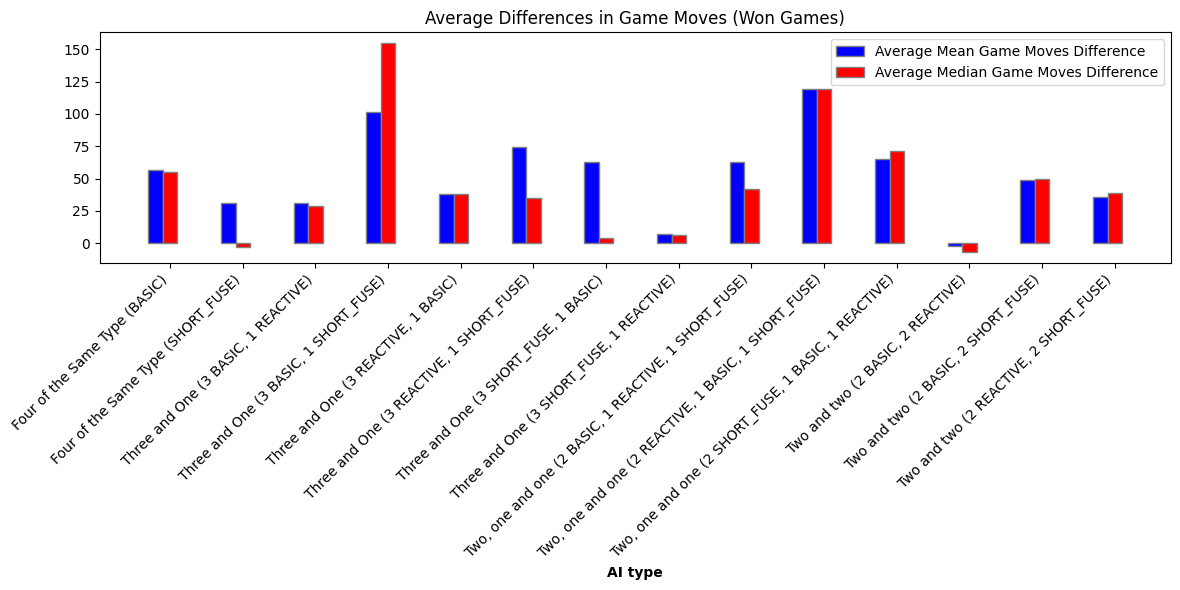

In [343]:
# plot
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))
# Set the bar width
bar_width = 0.2
# Set the positions of the bars on the x-axis
r1 = range(len(df_comparison_won_summary_game_moves))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
# Create bars for Average Mean Game Moves Difference
plt.bar(r1, df_comparison_won_summary_game_moves['Average Mean Game Moves Difference'], color='b', width=bar_width, edgecolor='grey', label='Average Mean Game Moves Difference')
# Create bars for Average Median Game Moves Difference
plt.bar(r2, df_comparison_won_summary_game_moves['Average Median Game Moves Difference'], color='r', width=bar_width, edgecolor='grey', label='Average Median Game Moves Difference')
# Add xticks on the middle of the group bars
plt.xlabel('AI type', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(df_comparison_won_summary_game_moves))], df_comparison_won_summary_game_moves['AI type'], rotation=45, ha='right')
# Create legend & Show graphic
plt.legend()
plt.title('Average Differences in Game Moves (Won Games)')
plt.tight_layout()
plt.show()

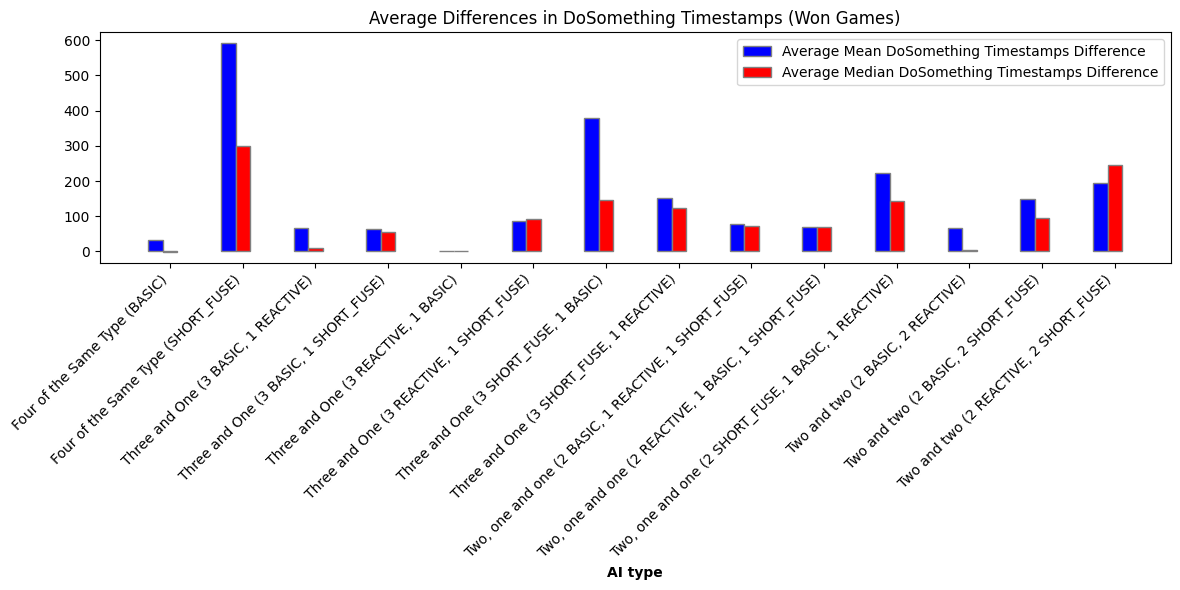

In [344]:
# plot
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))
# Set the bar width
bar_width = 0.2
# Set the positions of the bars on the x-axis
r1 = range(len(df_comparison_won_summary_do_something))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
# Create bars for Average Mean DoSomething Timestamps Difference
plt.bar(r1, df_comparison_won_summary_do_something['Average Mean DoSomething Timestamps Difference'], color='b', width=bar_width, edgecolor='grey', label='Average Mean DoSomething Timestamps Difference')
# Create bars for Average Median DoSomething Timestamps Difference
plt.bar(r2, df_comparison_won_summary_do_something['Average Median DoSomething Timestamps Difference'], color='r', width=bar_width, edgecolor='grey', label='Average Median DoSomething Timestamps Difference')
# Add xticks on the middle of the group bars
plt.xlabel('AI type', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(df_comparison_won_summary_do_something))], df_comparison_won_summary_do_something['AI type'], rotation=45, ha='right')
# Create legend & Show graphic
plt.legend()
plt.title('Average Differences in DoSomething Timestamps (Won Games)')
plt.tight_layout()
plt.show()

In [341]:
# fromdf_comparison_won_summary only show rows where AI type is ["SHORT_FUSE", "SHORT_FUSE", "BASIC", "REACTIVE"], 	["SHORT_FUSE", "SHORT_FUSE", "SHORT_FUSE", "REACTIVE"], ["SHORT_FUSE", "SHORT_FUSE", "SHORT_FUSE", "BASIC"], ["SHORT_FUSE", "SHORT_FUSE", "SHORT_FUSE", "SHORT_FUSE"], ["BASIC", "BASIC", "SHORT_FUSE", "SHORT_FUSE"]
df_comparison_won_summary_filtered = df_comparison_won_summary[df_comparison_won_summary['AI type'].isin([
    "Four of the Same Type (SHORT_FUSE)",
    "Three and One (3 SHORT_FUSE, 1 REACTIVE)",
    "Three and One (3 SHORT_FUSE, 1 BASIC)",
    "Two, one and one (2 SHORT_FUSE, 1 BASIC, 1 REACTIVE)",
    "Two and two (2 BASIC, 2 SHORT_FUSE)"
])]
df_comparison_won_summary_filtered

,AI type,Average Mean Game Moves Difference,Average Median Game Moves Difference,Average Mean DoSomething Timestamps Difference,Average Median DoSomething Timestamps Difference
1,Four of the Same Type (SHORT_FUSE),31.1,-3.0,592.8,300.8
6,"Three and One (3 SHORT_FUSE, 1 BASIC)",63.1,4.0,379.0,145.8
7,"Three and One (3 SHORT_FUSE, 1 REACTIVE)",7.1,6.5,150.4,122.2
10,"Two, one and one (2 SHORT_FUSE, 1 BASIC, 1 REA...",64.9,71.0,221.4,143.8
12,"Two and two (2 BASIC, 2 SHORT_FUSE)",48.8,49.5,148.0,94.8
